In [1]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')


In [2]:
# 2. Load the Dataset
df = pd.read_csv("Zoo.csv")

# Display the first few rows
df.head()


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
# 3. Basic Exploration
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
# Statistical Summary
df.describe()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
# Check Unique Classes in Target Variable
df['type'].unique()


array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

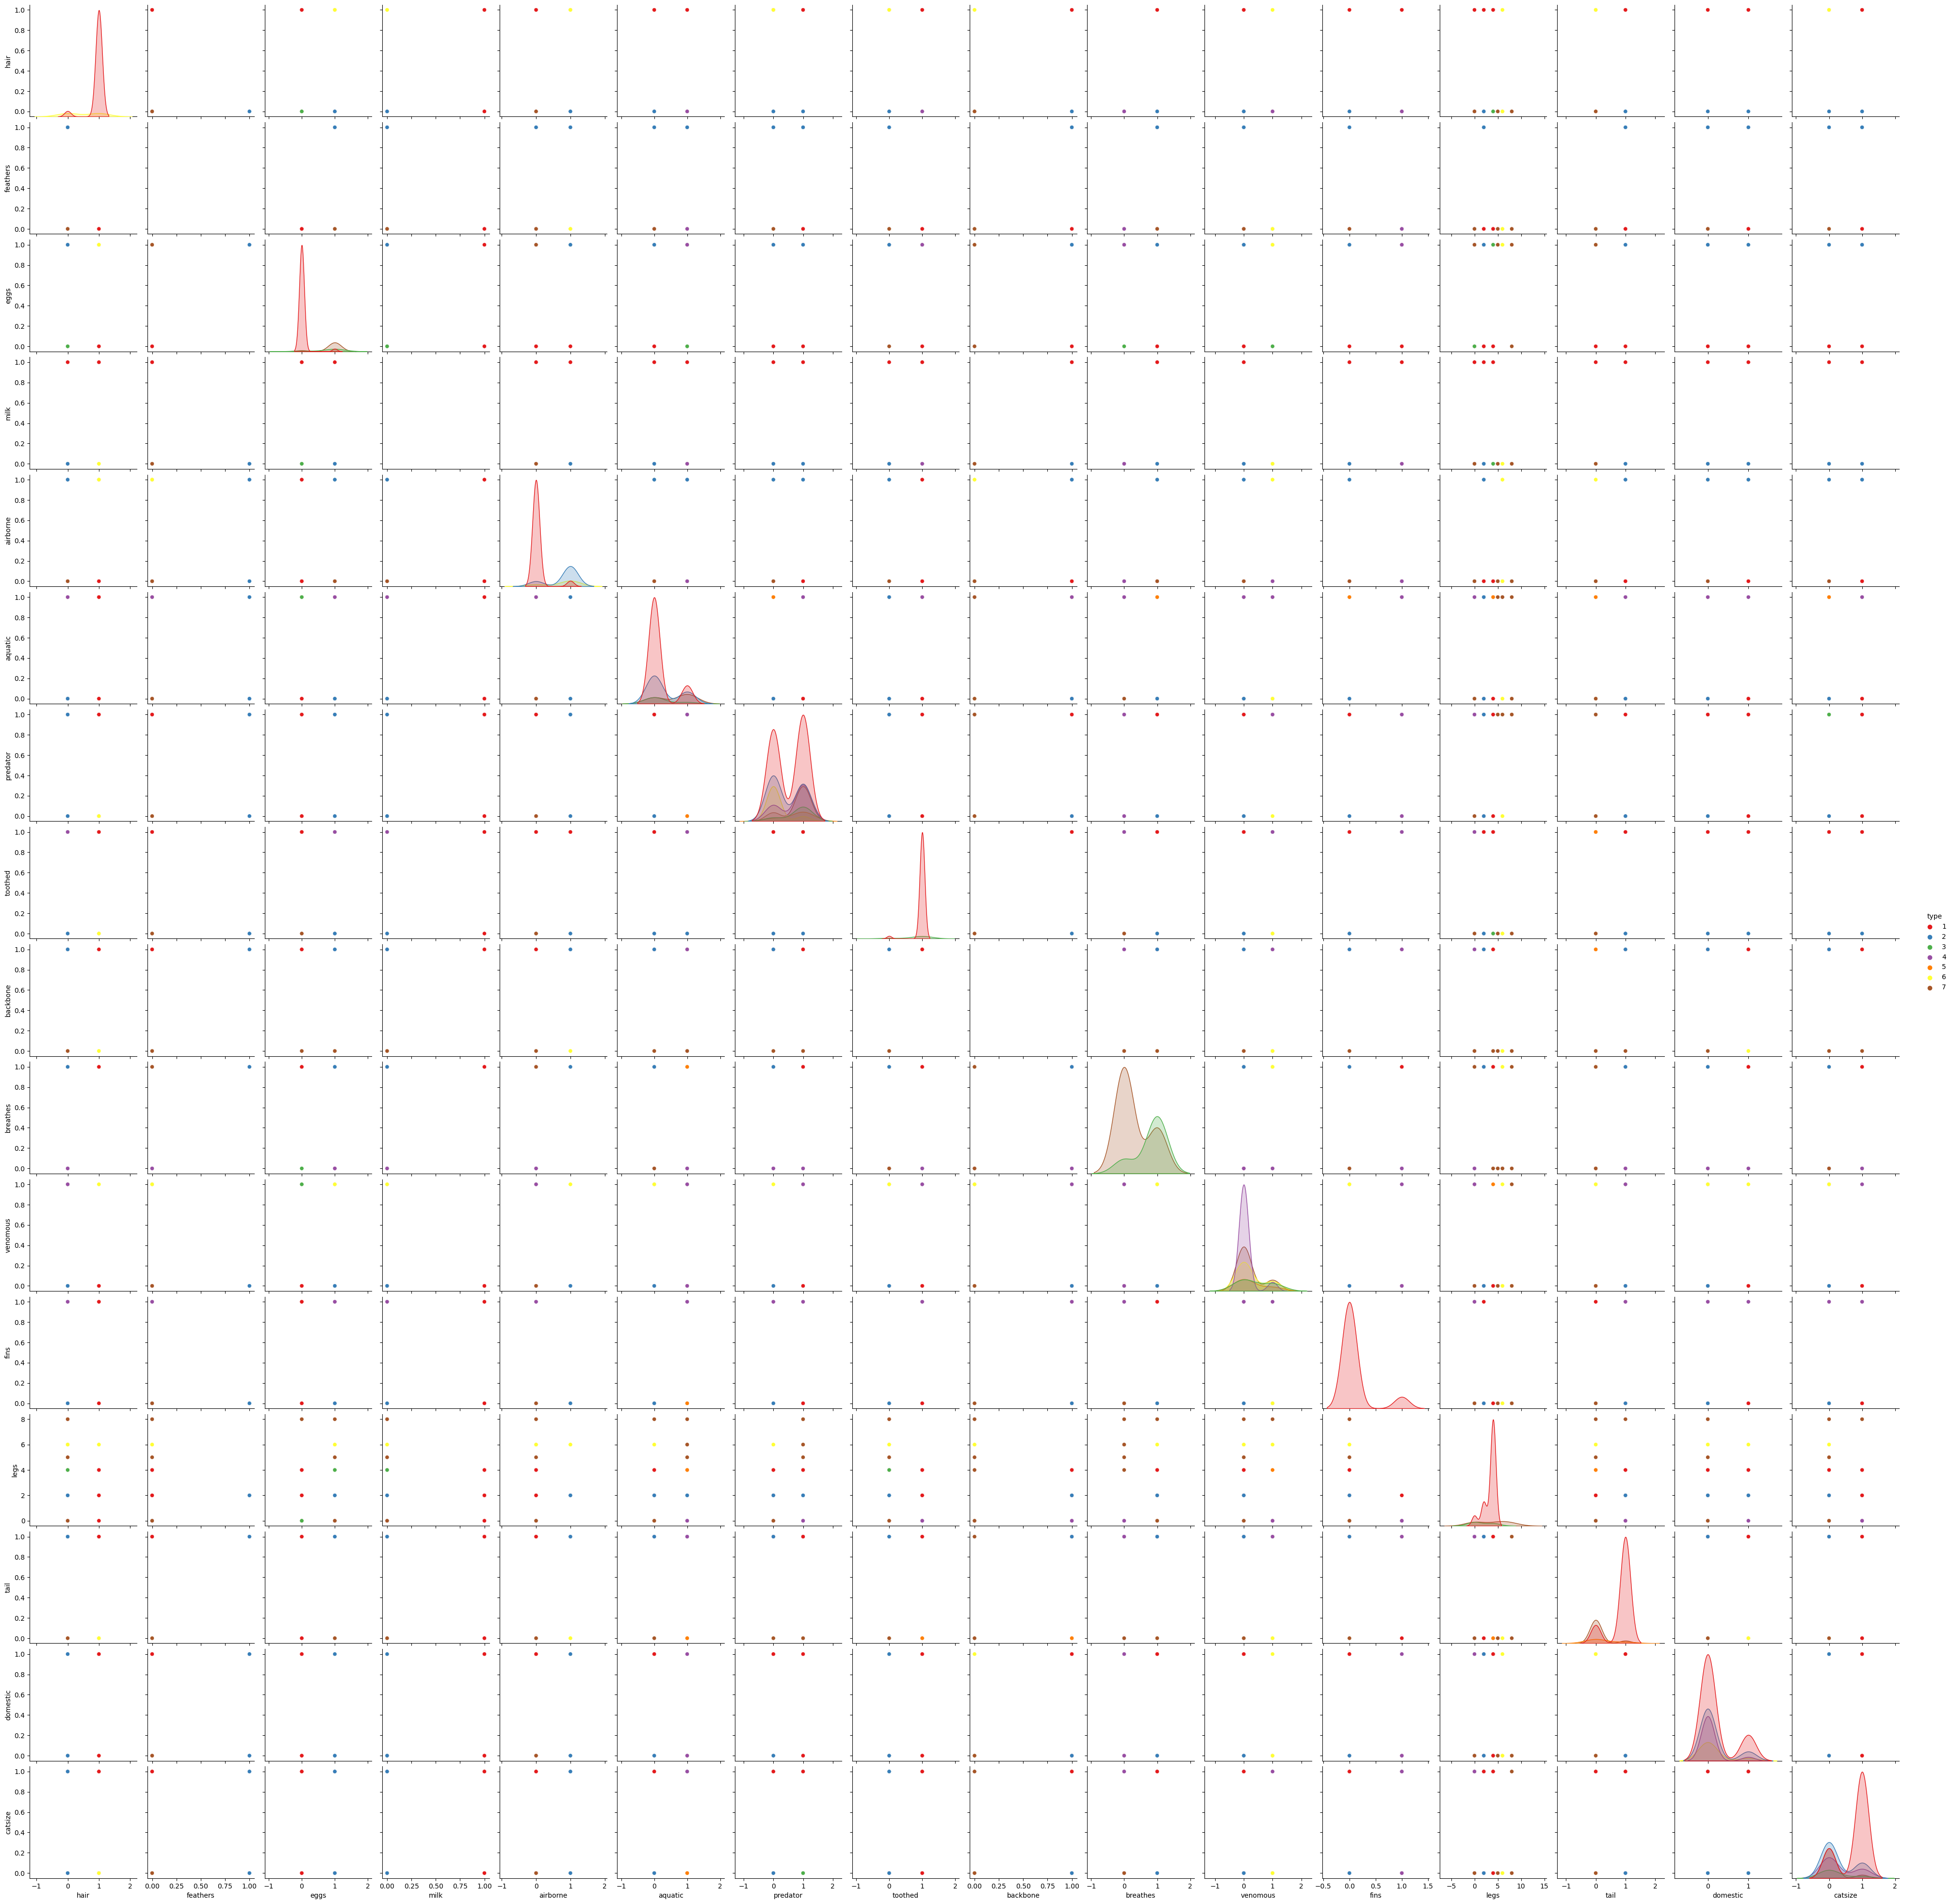

In [11]:
# 4. Visualizations

# Pairplot for relationships
sns.pairplot(df.drop(columns=['animal name']), hue='type', palette='Set1')
plt.show()



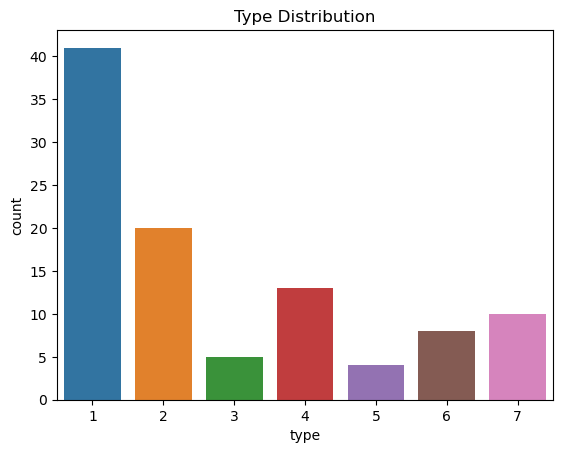

In [13]:
# Countplot of Class Types
sns.countplot(x='type', data=df)
plt.title('Type Distribution')
plt.show()


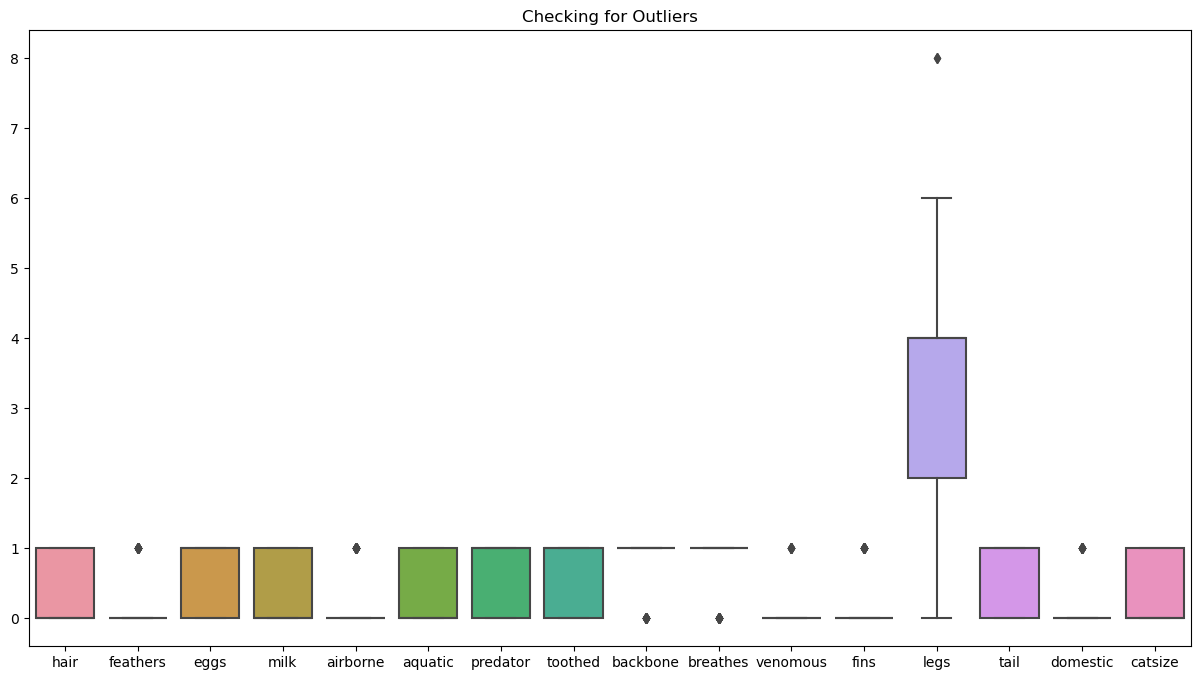

In [15]:
# Outliers Check
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns=['animal name', 'type']))
plt.title('Checking for Outliers')
plt.show()


In [17]:
# 5. Data Preprocessing

# Drop 'animal_name' as it's not useful
df = df.drop(columns=['animal name'])

# Split Features and Target
X = df.drop(columns=['type'])
y = df['type']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
# 6. Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (80, 16)
Testing Data Shape: (21, 16)


In [21]:
# 7. Train KNN Classifier

# Initialize KNN with k=5
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Train the Model
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [23]:
# 8. Model Evaluation

# Predictions
y_pred = knn_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9524
Precision: 0.9206
Recall: 0.9524
F1 Score: 0.9333


In [25]:
# Detailed Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



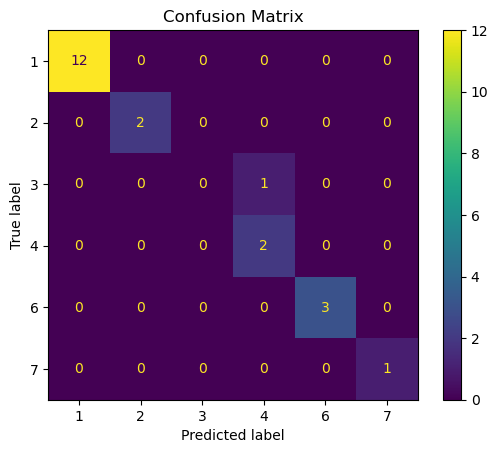

In [27]:
# 9. Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


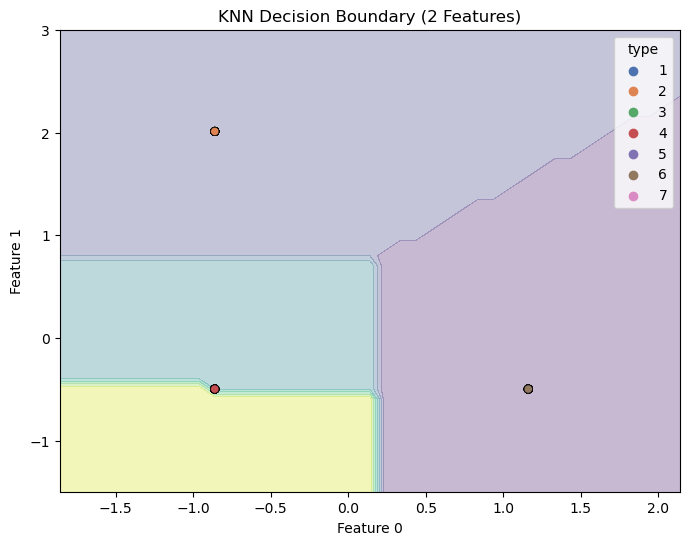

In [29]:
# 10. Visualize Decision Boundary

# Choose any two features (e.g., 'hair' and 'feathers' are 0 and 1 in the scaled array)
feature1 = 0
feature2 = 1

X_train_vis = X_train[:, [feature1, feature2]]
X_test_vis = X_test[:, [feature1, feature2]]

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis, y_train)

# Plot Decision Boundary
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_train_vis[:, 0], y=X_train_vis[:, 1], hue=y_train, palette='deep', edgecolor='k')
plt.title('KNN Decision Boundary (2 Features)')
plt.xlabel(f"Feature {feature1}")
plt.ylabel(f"Feature {feature2}")
plt.show()


In [31]:
# Answer 1: Key Hyperparameters in KNN
print('''
Key Hyperparameters in KNN:
1. n_neighbors (K): Number of neighbors to consider for classification.
2. metric: Distance metric used to calculate similarity (e.g., 'minkowski', 'euclidean', 'manhattan').
3. p: Power parameter for Minkowski distance.
   - p=1 is Manhattan distance.
   - p=2 is Euclidean distance.
4. weights: Weight function used in prediction.
   - 'uniform': All neighbors are weighted equally.
   - 'distance': Closer neighbors have more influence.
5. algorithm: Algorithm to compute nearest neighbors.
   - 'auto', 'ball_tree', 'kd_tree', 'brute'.

Choosing the right values for these hyperparameters can improve KNN performance.
''')



Key Hyperparameters in KNN:
1. n_neighbors (K): Number of neighbors to consider for classification.
2. metric: Distance metric used to calculate similarity (e.g., 'minkowski', 'euclidean', 'manhattan').
3. p: Power parameter for Minkowski distance.
   - p=1 is Manhattan distance.
   - p=2 is Euclidean distance.
4. weights: Weight function used in prediction.
   - 'uniform': All neighbors are weighted equally.
   - 'distance': Closer neighbors have more influence.
5. algorithm: Algorithm to compute nearest neighbors.
   - 'auto', 'ball_tree', 'kd_tree', 'brute'.

Choosing the right values for these hyperparameters can improve KNN performance.



In [33]:
# Answer 2: Common Distance Metrics in KNN
print('''
Common Distance Metrics in KNN:
1. Euclidean Distance (p=2): Straight-line distance between two points.
2. Manhattan Distance (p=1): Sum of the absolute differences between points.
3. Minkowski Distance: Generalized distance formula; p can be adjusted.
4. Hamming Distance: Measures differences between categorical data (useful for text or binary data).
5. Cosine Similarity: Measures the angle between two vectors (used in text data or high-dimensional data).

The choice of distance metric depends on the nature of the data and the problem being solved.
''')



Common Distance Metrics in KNN:
1. Euclidean Distance (p=2): Straight-line distance between two points.
2. Manhattan Distance (p=1): Sum of the absolute differences between points.
3. Minkowski Distance: Generalized distance formula; p can be adjusted.
4. Hamming Distance: Measures differences between categorical data (useful for text or binary data).
5. Cosine Similarity: Measures the angle between two vectors (used in text data or high-dimensional data).

The choice of distance metric depends on the nature of the data and the problem being solved.

